**Cálculo de Métricas de Avaliação de Aprendizado**

Desafio de projeto realizado durante Formação Machine Learning Specialist - Digital Innovation One

Aluno: Roberto Silva De Oliveira

Objetivo: A partir da matriz de confusão informada no exercício, calcular as principais métricas para avaliação de modelos de classificação de dados: acurácia, sensibilidade (recall), especificidade, precisão e F-score

In [3]:
!pip install -q tensorflow-gpu==2.0.0

In [4]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [5]:
tf.__version__

'2.0.0'

In [6]:
%load_ext tensorboard

In [7]:
logdir='log'

In [8]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [10]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images, 
            y=train_labels, 
            epochs=1, 
            validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 74s 1ms/sample - loss: 0.1512 - accuracy: 0.9532 - val_loss: 0.0532 - val_accuracy: 0.9832


In [12]:
y_true=test_labels
y_pred=model.predict_classes(test_images)


In [13]:
classes=[0,1,2,3,4,5,6,7,8,9]

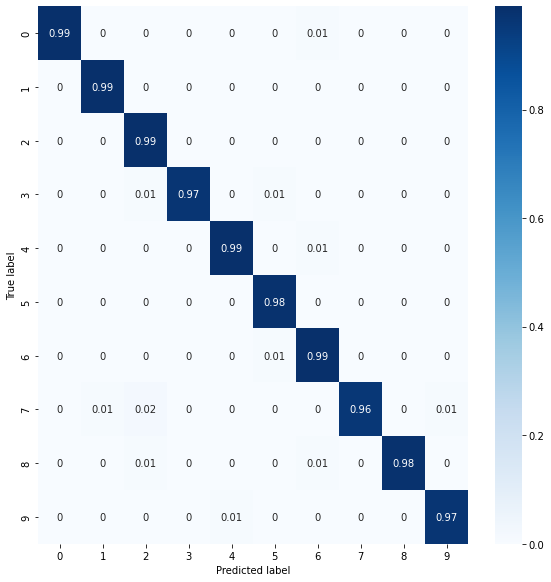

In [14]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

A matriz de confusão do exemplo possui 10 classes, nesse caso a extração das métricas de performance é um pouco mais complexa que nas matrizes de confusão 2X2, como pode ser observado na figura abaixo:

![1_uQDpo9iISx00ucl3gftLVA[1].png](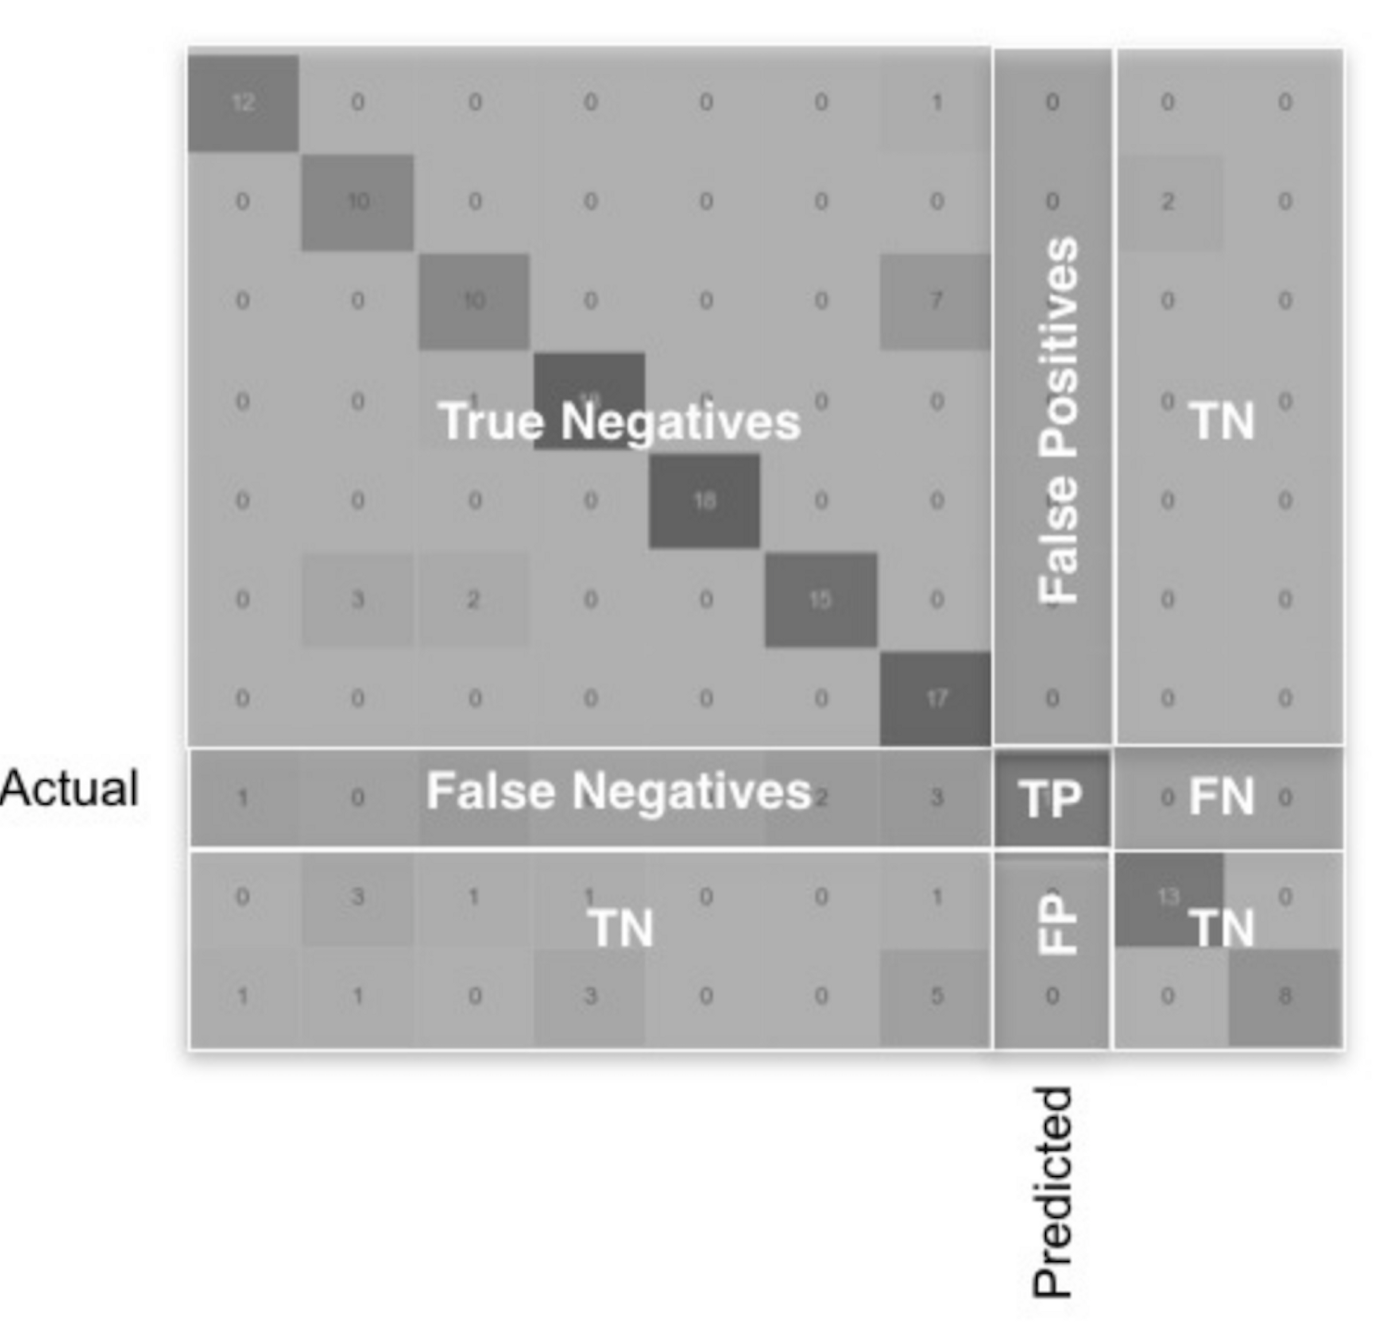)

In [15]:
FP = con_mat.sum(axis=0) - np.diag(con_mat) 
FN = con_mat.sum(axis=1) - np.diag(con_mat)
VP = np.diag(con_mat)
VN = con_mat.sum() - (FP + FN + VP)
total_itens = 10000

# O resultado são arrays de 10 elementos (um para cada classe).
# FP[10] - array com os falsos positivos das 10 classes
# FN[10] - array com os falsos negativos das 10 classes
# VP[10] - array com os verdadeiros positivos das 10 classes
# VN[10] - array com os verdadeiros negativos das 10 classes

acuracia =  (VP + VN)/(FP + FN + VP + VN)
sensibilidade = VP/(VP+FN)
especificidade = VN/(VN+FP)
precisao = VP/(VP+FP)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)



print("Falsos Positivos: ", FP)
print("Falsos Negativos: ", FN)
print("Verdadeiros Positivos: ", VP)
print("Verdadeiros Negativos: ", VN)
print ("\nAcuracia: ", acuracia)
print ("\nSensibilidade: ", sensibilidade)
print ("\nEspecificidade: ", especificidade)
print ("\nPrecisão: ", precisao)
print ("\nf_score: ", f_score)



Falsos Positivos:  [ 7 15 45  4 13 18 23 13 13 17]
Falsos Negativos:  [ 9  6  6 27  7 15 11 36 23 28]
Verdadeiros Positivos:  [ 971 1129 1026  983  975  877  947  992  951  981]
Verdadeiros Negativos:  [9013 8850 8923 8986 9005 9090 9019 8959 9013 8974]

Acuracia:  [0.9984 0.9979 0.9949 0.9969 0.998  0.9967 0.9966 0.9951 0.9964 0.9955]

Sensibilidade:  [0.99081633 0.99471366 0.99418605 0.97326733 0.99287169 0.98318386
 0.98851775 0.96498054 0.97638604 0.97224975]

Especificidade:  [0.99922395 0.99830795 0.99498216 0.99955506 0.99855844 0.99802372
 0.99745631 0.99855105 0.99855972 0.99810922]

Precisão:  [0.99284254 0.98688811 0.95798319 0.99594732 0.98684211 0.97988827
 0.97628866 0.98706468 0.98651452 0.98296593]

f_score:  [0.9918284  0.99078543 0.97574893 0.98447672 0.98984772 0.9815333
 0.98236515 0.97589769 0.98142415 0.97757848]
